## Shashank Rawat

## Task 2: To Explore Supervised Machine Learning 

## Objective:    
**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

*Importing all the Required libraries:*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Loading the Data:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data imported successfully")

ds.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Basic Data Exploration:**

In [3]:
ds.shape

(25, 2)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
ds.dtypes

Hours     float64
Scores      int64
dtype: object

## Plotting the Data: 

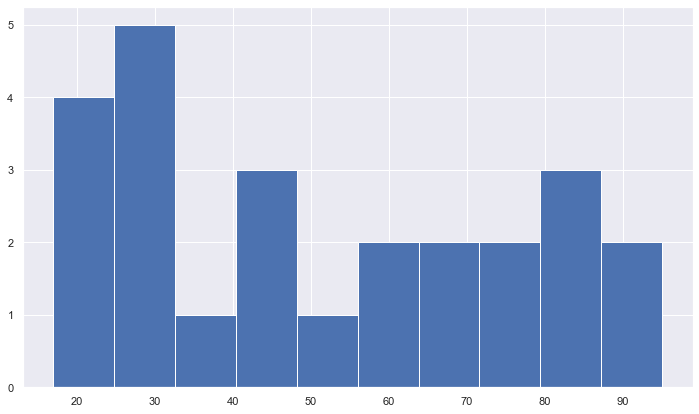

In [7]:
# Histogram plot of Score:
plt.figure(figsize=(12,7))
ds.Scores.hist()

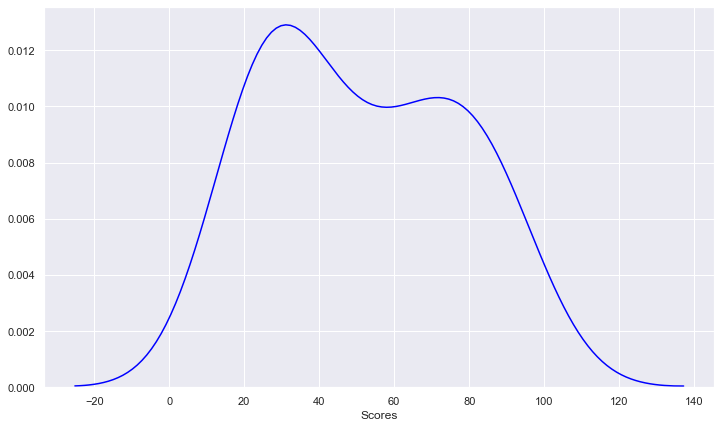

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(ds.Scores,color='blue',hist=False)

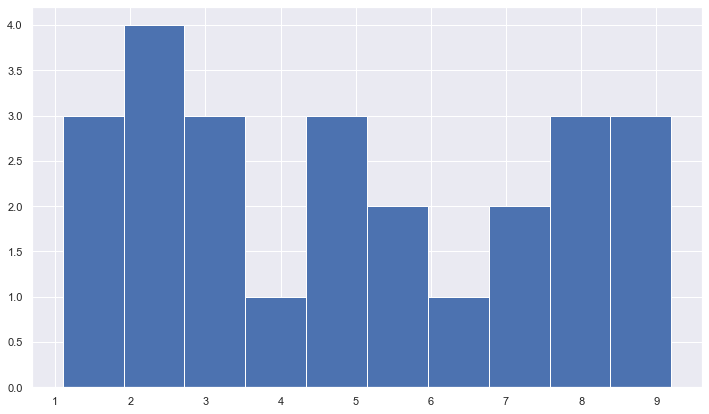

In [9]:
# Histogram plot of Hours Studied:
plt.figure(figsize=(12,7))
ds.Hours.hist()

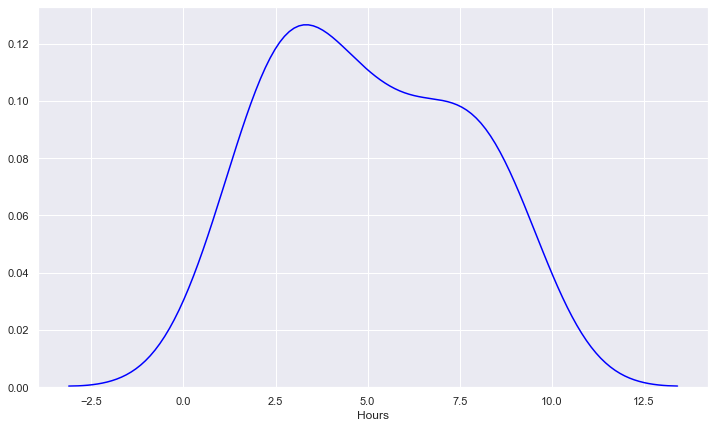

In [36]:
plt.figure(figsize=(12,7))
sns.distplot(ds.Hours,color='blue',hist=False)

## Scatter-Plot of Data:

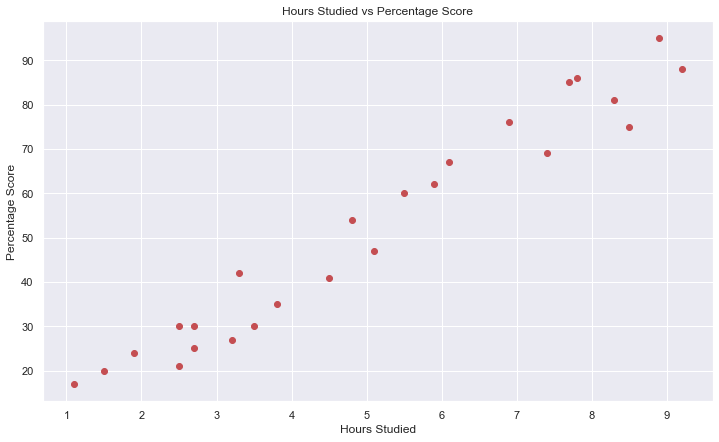

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(x=ds.Hours, y=ds.Scores,c='r')  
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [37]:
x=ds[['Hours']]
y=ds['Scores']

In [38]:
x.shape

(25, 1)

In [13]:
y.shape

(25,)

## Train-Test Split: 

In [39]:
# divide the data into training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [40]:
train_X

,Hours
8,8.3
7,5.5
11,5.9
4,3.5
3,8.5
24,7.8
12,4.5
16,2.5
9,2.7
14,1.1


In [41]:
test_X

,Hours
5,1.5
21,4.8
22,3.8
18,6.1
15,8.9


In [42]:
# Importing Linear Regression Library:
from sklearn.linear_model import LinearRegression

### Training the Model:

In [43]:
lin_reg= LinearRegression()
lin_reg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R-square:

In [44]:
# To get the R-squared in sklearn we must call the appropriate method
print('R-Square:',lin_reg.score(train_X,train_y))

R-Square: 0.9493255692526655


**Parameters of Regression:**

In [45]:
print('Coefficient:',lin_reg.coef_)

Coefficient: [9.60171878]


In [46]:
print('intercept:',lin_reg.intercept_)

intercept: 2.6953889223457423


### Plotting the Regression Line: 

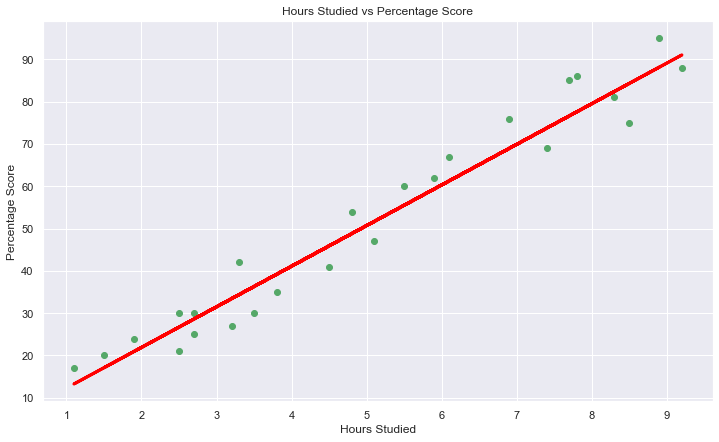

In [47]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,c='g')
# Parametrized version of the regression line
yhat = lin_reg.coef_*x + lin_reg.intercept_
# Plotting the regression line
fig = plt.plot(x,yhat, lw=3, c='red', label ='regression line')
# Labelling our axes
plt.title('Hours Studied vs Percentage Score')  
plt.ylabel('Percentage Score')
plt.xlabel('Hours Studied')
plt.show()

## Prediction:

In [48]:
y_pred=lin_reg.predict(test_X)

In [49]:
ds_test= pd.DataFrame({'Score':test_y,'Predicted_Score':y_pred,'Residual':test_y-y_pred})
ds_test

,Score,Predicted_Score,Residual
5,20,17.097967,2.902033
21,54,48.783639,5.216361
22,35,39.181920,-4.181920
18,67,61.265873,5.734127
15,95,88.150686,6.849314


### Model Score: 

In [63]:
print('Training Score:',lin_reg.score(train_X,train_y))
print('Testing Score:',lin_reg.score(test_X,test_y))

Training Score: 0.9493255692526655
Testing Score: 0.9605221627526419


### Residual Plot:

In [50]:
import seaborn as sns

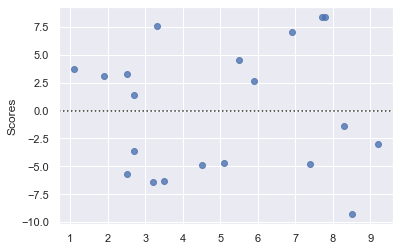

In [51]:
sns.residplot(train_X,train_y)

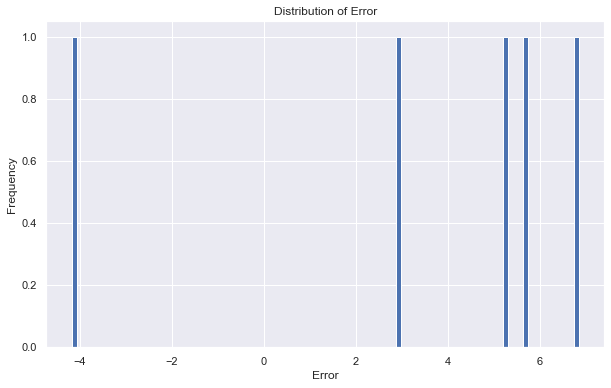

In [52]:
#Histogram for  Residual distribution:
plt.figure(figsize=(10,6), facecolor='w', edgecolor='b')
plt.hist(ds_test.Residual, bins=100)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error')
plt.show()

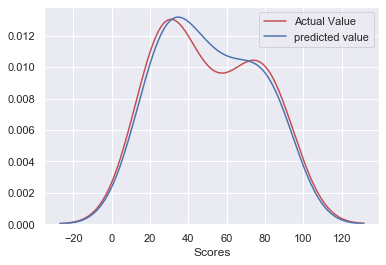

In [53]:
ax1=sns.distplot(train_y,hist=False,color='r',label='Actual Value')
sns.distplot(yhat,hist=False,color='b',label='predicted value',ax=ax1)

## Evaluating the Model:

In [55]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
print('R-squared:',r2_score(test_y,y_pred))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_y, y_pred)) 
print('Mean Squared Error: ',metrics.mean_squared_error(test_y,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(test_y,y_pred)))

R-squared: 0.9605221627526419
Mean Absolute Error: 4.9767509236804015
Mean Squared Error:  26.582796488881087
Root Mean Squared Error:  5.15585070467339


## Prediction for 9.5 hours: 

In [64]:
hour=9.5
pred=lin_reg.predict([[9.5]])
print("Number of Hours Studied = {}".format(hour))
print("Predicted Score = {}".format(pred[0].round(2)))

Number of Hours Studied = 9.5
Predicted Score = 93.91


### Result:
**If a Student study for 9.5 hours, the Predicted Score is 93.91**